In [33]:
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df_loaded = pd.read_pickle("morphologies_snapshot_data.pkl")
# df_loaded = pd.read_csv("galaxies_morph.csv")
print(df_loaded.dtypes)
print(df_loaded.columns)


Snapshot        int16
P_Disk        float32
P_Irr         float32
P_Spheroid    float32
SubhaloID       int32
dtype: object
Index(['Snapshot', 'P_Disk', 'P_Irr', 'P_Spheroid', 'SubhaloID'], dtype='object')


In [8]:
df_loaded


,Snapshot,P_Disk,P_Irr,P_Spheroid,SubhaloID
0,25,7.245970e-02,0.117432,0.722801,0
1,25,5.781485e-01,0.998808,0.005097,1
2,25,4.213989e-03,0.956770,0.000231,2
3,25,1.822633e-07,0.940426,0.000151,3
4,25,2.275765e-03,0.683999,0.009307,4
...,...,...,...,...,...
11042,67,1.095557e-02,0.036651,0.673602,682369
11043,67,6.801021e-01,0.075180,0.808437,695842
11044,67,9.071031e-01,0.472021,0.525315,700971
11045,67,5.779260e-01,0.255193,0.776309,717138


In [29]:
snapshot_values = df_loaded["Snapshot"].drop_duplicates().to_list()
snapshot_values


[25, 29, 33, 40, 50, 67]

In [32]:
galaxies_count = []
for val in snapshot_values:
    print(val, ":", df_loaded[df_loaded["Snapshot"]==val].shape[0])
    galaxies_count.append(df_loaded[df_loaded["Snapshot"]==val].shape[0])


25 : 837
29 : 1212
33 : 1587
40 : 2014
50 : 2474
67 : 2923


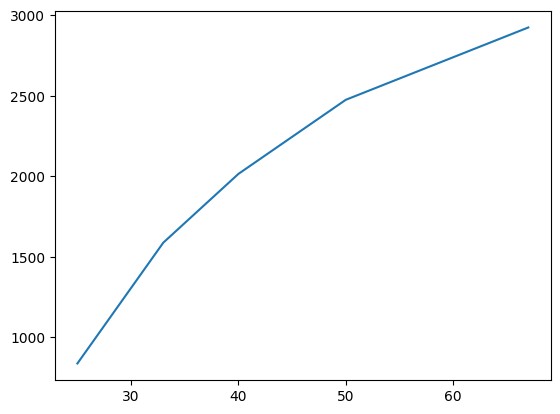

In [34]:
plt.plot(snapshot_values, galaxies_count)
plt.show()


In [ ]:
galmorph.galaxy_type(snapshot_values)


In [ ]:

def assign_galaxy_type(row) -> str:
    """
    Assigns a galaxy type based on the highest value among three input columns.

    Parameters:
        row (pd.Series): A row from a DataFrame.
        col_elliptical (str): Column name for elliptical score/value.
        col_spiral (str): Column name for spiral score/value.
        col_irregular (str): Column name for irregular score/value.

    Returns:
        str: 'elliptical', 'spiral', or 'irregular' depending on which value is highest.
    """
    values = {
        'elliptical': row["P_Spheroid"],
        'spiral': row["P_Disk"],
        'irregular': row["P_Irr"]
    }
    return max(values, key=values.get)


In [38]:
assign_galaxy_type(df_loaded.iloc[0])


'elliptical'

In [40]:
df_loaded["Galaxy_type"] = df_loaded.apply(assign_galaxy_type, axis=1)


In [ ]:
df_loaded


,Snapshot,P_Disk,P_Irr,P_Spheroid,SubhaloID,Galaxy_type
0,25,7.245970e-02,0.117432,0.722801,0,elliptical
1,25,5.781485e-01,0.998808,0.005097,1,irregular
2,25,4.213989e-03,0.956770,0.000231,2,irregular
3,25,1.822633e-07,0.940426,0.000151,3,irregular
4,25,2.275765e-03,0.683999,0.009307,4,irregular
...,...,...,...,...,...,...
11042,67,1.095557e-02,0.036651,0.673602,682369,elliptical
11043,67,6.801021e-01,0.075180,0.808437,695842,elliptical
11044,67,9.071031e-01,0.472021,0.525315,700971,spiral
11045,67,5.779260e-01,0.255193,0.776309,717138,elliptical


In [49]:
print(min((df_loaded[df_loaded["Galaxy_type"] == "elliptical"].reset_index())["P_Spheroid"]))

print(max((df_loaded[df_loaded["Galaxy_type"] == "elliptical"].reset_index())["P_Spheroid"]))


0.01684477925300598
0.9083166122436523


In [55]:
min_index= (df_loaded[df_loaded["Galaxy_type"] == "elliptical"]).loc[:,"P_Spheroid"].idxmin()
min_index


np.int64(8947)

In [56]:
df_loaded.iloc[min_index]


Snapshot               67
P_Disk           0.000002
P_Irr             0.01199
P_Spheroid       0.016845
SubhaloID          279689
Galaxy_type    elliptical
Name: 8947, dtype: object

In [43]:
df_loaded[df_loaded["Snapshot"]== 67][df_loaded["Galaxy_type"] == "elliptical"].reset_index()


/tmp/ipykernel_134992/1153019592.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_loaded[df_loaded["Snapshot"]== 67][df_loaded["Galaxy_type"] == "elliptical"].reset_index()


,index,Snapshot,P_Disk,P_Irr,P_Spheroid,SubhaloID,Galaxy_type
0,8124,67,0.332089,0.311070,0.650227,0,elliptical
1,8128,67,0.510369,0.080988,0.702057,4,elliptical
2,8129,67,0.370965,0.091346,0.751807,5,elliptical
3,8131,67,0.261759,0.056441,0.803335,7,elliptical
4,8134,67,0.437897,0.069527,0.515960,10,elliptical
...,...,...,...,...,...,...,...
631,11040,67,0.239825,0.039993,0.613430,673929,elliptical
632,11042,67,0.010956,0.036651,0.673602,682369,elliptical
633,11043,67,0.680102,0.075180,0.808437,695842,elliptical
634,11045,67,0.577926,0.255193,0.776309,717138,elliptical


In [ ]:
df_loaded[df_loaded["Snapshot"]]


,Snapshot,P_Disk,P_Irr,P_Spheroid,SubhaloID
5,25,0.176502,0.808699,0.001593,5
842,29,0.579392,0.497376,0.000832,5
2054,33,0.602546,0.970885,0.005325,5
3641,40,0.692633,0.950574,0.006378,5
5655,50,0.300213,0.088920,0.571605,5
8129,67,0.370965,0.091346,0.751807,5


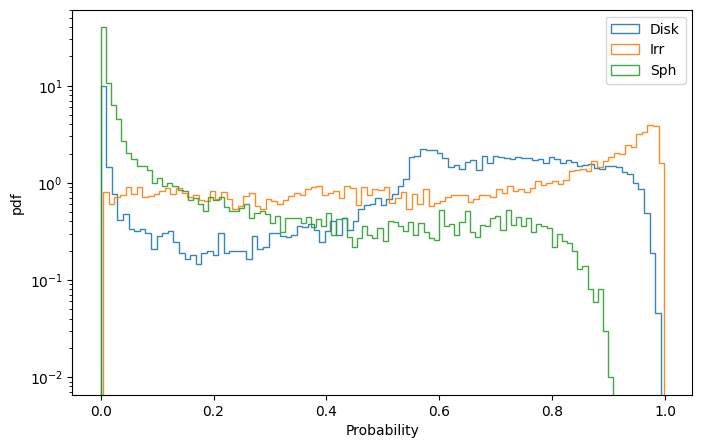

In [36]:

plt.figure(figsize=[8, 5])
plt.hist(df_loaded["P_Disk"], bins=100, density=True, alpha = 0.9, histtype='step', label = "Disk")
plt.hist(df_loaded["P_Irr"], bins=100, density=True, alpha = 0.9,histtype='step', label = "Irr")
plt.hist(df_loaded["P_Spheroid"], bins=100, density=True, alpha = 0.9, histtype='step', label = "Sph")
plt.yscale('log')
plt.xlabel("Probability")
plt.ylabel("pdf")
plt.legend()
plt.show()


In [4]:
import galmorph.core as gm


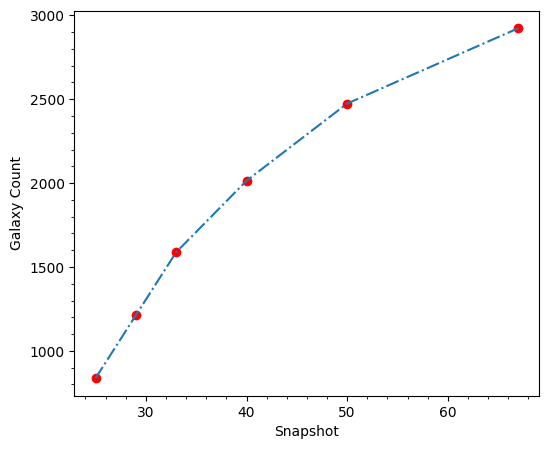

In [5]:
Galsim = gm.GalMorph(file_path="data/morphologies_snapshot_data.pkl")
Galsim.Galaxy_count(file_name="test1.png")


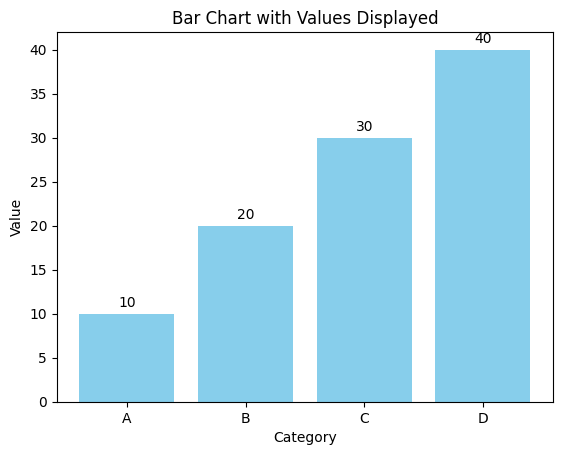

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
categories = ["A", "B", "C", "D"]
values = [10, 20, 30, 40]

# Create the bars and store the BarContainer object
bars = ax.bar(categories, values, color='skyblue')

# Add labels to the bars
ax.bar_label(bars, label_type='edge', padding=3, color='black', fontsize=10)

ax.set_xlabel("Category")
ax.set_ylabel("Value")
ax.set_title("Bar Chart with Values Displayed")
plt.show()
